In [1]:
from dust_emissivity import dust

In [2]:
from astropy.io import fits
from astropy import wcs

In [3]:
from astropy import units as u, coordinates

In [4]:
import regions

In [5]:
%matplotlib inline
import pylab as pl

In [6]:
# for bolocam (and maybe ATLASGAL?)
import radio_beam 

In [7]:
from spectral_cube import SpectralCube

In [8]:
import numpy as np

In [9]:
herfn_1 = '/orange/adamginsburg/higal/Field4_0_Combined_SPIRE_SpirePacsParallel_250_1342214761-1342214762_extd.fits'
herfn_2 = '/orange/adamginsburg/higal/Field4_0_Combined_SPIRE_SpirePacsParallel_350_1342214761-1342214762_extd.fits'
herfn_3 = '/orange/adamginsburg/higal/Field4_0_Combined_SPIRE_SpirePacsParallel_500_1342214761-1342214762_extd.fits'
pacsfn_1 = '/orange/adamginsburg/higal/Field4_0_PACS_SpirePacsParallel_160_1342214761-1342214762_jscanam.fits'
pacsfn_2 = '/orange/adamginsburg/higal/Field4_0_PACS_SpirePacsParallel_70_1342214761-1342214762_jscanam.fits'

In [10]:
reg = regions.Regions.read('../G5/sum/spw17_12CO/ccc.reg')

In [11]:
reg

<Regions([<RectangleSkyRegion(center=<SkyCoord (Galactic): (l, b) in deg
    (5.390779, -0.407864)>, width=195.4252 arcsec, height=163.3396 arcsec, angle=0.0 deg)>])>

In [12]:
r0 = reg[0]

In [13]:
bgreg = regions.RectangleAnnulusSkyRegion(center=reg[0].center, inner_width=reg[0].width, inner_height=reg[0].height, outer_width=reg[0].width*2, outer_height=reg[0].height*2)
bgreg

<RectangleAnnulusSkyRegion(center=<SkyCoord (Galactic): (l, b) in deg
    (5.390779, -0.407864)>, inner_width=195.4252 arcsec, outer_width=390.8504 arcsec, inner_height=163.3396 arcsec, outer_height=326.6792 arcsec, angle=0.0 deg)>

### 160 $\mu$m

In [14]:
hdul = fits.open(pacsfn_1)

In [15]:
ww = wcs.WCS(hdul[1].header)

In [16]:
# preg is short for pixel region
preg = r0.to_pixel(ww)
mask = preg.to_mask()

In [17]:
cutout = mask.cutout(hdul[1].data)

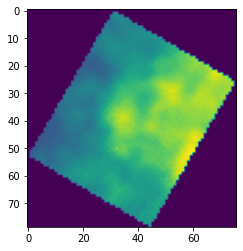

In [18]:
pl.imshow(mask.multiply(hdul[1].data))

0.09666766140337787

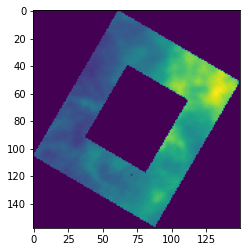

In [19]:
bgpreg = bgreg.to_pixel(ww)
bgmask = bgpreg.to_mask()
pl.imshow(bgmask.multiply(hdul[1].data))
bgim = bgmask.multiply(hdul[1].data)
bg = np.nanpercentile(bgim[bgim!=0], 10)
bg

In [20]:
hdul[1].header['BUNIT']

'Jy/pixel'

In [21]:
pixelarea = 1*u.pixel

In [22]:
(mask.multiply(hdul[1].data) *u.Unit(hdul[1].header['BUNIT']) * pixelarea).sum().to(u.Jy)

<Quantity 659.89015534 Jy>

In [23]:
pacs160 = (mask.multiply(hdul[1].data - bg) *u.Unit(hdul[1].header['BUNIT']) * pixelarea).sum().to(u.Jy)
pacs160

<Quantity 358.38371942 Jy>

In [24]:
659.9 - 358.8

301.09999999999997

In [25]:
(659.9 - 358.8)/659.9

0.45628125473556597

## 70 $\mu$m

In [26]:
hdul = fits.open(pacsfn_2)
ww = wcs.WCS(hdul[1].header)

In [27]:
# preg is short for pixel region
preg = r0.to_pixel(ww)
mask = preg.to_mask()

In [28]:
cutout = mask.cutout(hdul[1].data)

In [29]:
hdul[1].data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

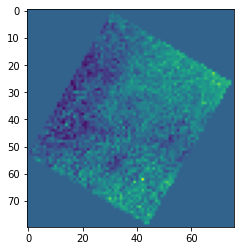

In [30]:
pl.imshow(mask.multiply(hdul[1].data))

-0.00715444960701472

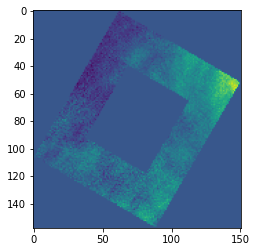

In [31]:
bgpreg = bgreg.to_pixel(ww)
bgmask = bgpreg.to_mask()
pl.imshow(bgmask.multiply(hdul[1].data))
bgim = bgmask.multiply(hdul[1].data)
bg = np.nanpercentile(bgim[bgim!=0], 10)
bg

In [32]:
hdul[1].header['BUNIT']

'Jy/pixel'

In [33]:
pixelarea = 1*u.pixel

In [34]:
(mask.multiply(hdul[1].data) *u.Unit(hdul[1].header['BUNIT']) * pixelarea).sum().to(u.Jy)

<Quantity 8.96455483 Jy>

In [35]:
pacs70 = (mask.multiply(hdul[1].data - bg) *u.Unit(hdul[1].header['BUNIT']) * pixelarea).sum().to(u.Jy)
pacs70

<Quantity 31.27212871 Jy>

## 350 $\mu$m

In [36]:
hdul = fits.open(herfn_2)
ww = wcs.WCS(hdul[1].header)

In [37]:
hdul[1].header['BUNIT']

'MJy/sr'

In [38]:
pixelarea = ww.proj_plane_pixel_area().to(u.sr)

In [39]:
pixelarea

<Quantity 2.35044305e-09 sr>

In [40]:
# preg is short for pixel region
preg = r0.to_pixel(ww)
mask = preg.to_mask()

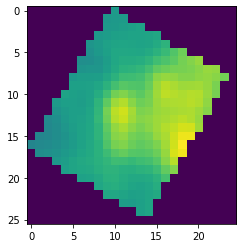

In [41]:
pl.imshow(mask.multiply(hdul[1].data))

462.17941901265095

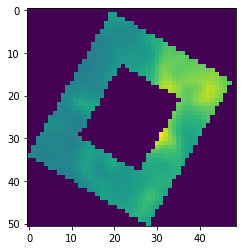

In [42]:
bgpreg = bgreg.to_pixel(ww)
bgmask = bgpreg.to_mask()
pl.imshow(bgmask.multiply(hdul[1].data))
bgim = bgmask.multiply(hdul[1].data)
bg = np.nanpercentile(bgim[bgim!=0], 10)
bg

In [43]:
(mask.multiply(hdul[1].data) *u.Unit(hdul[1].header['BUNIT']) * pixelarea).sum().to(u.Jy)

<Quantity 531.67255111 Jy>

In [44]:
her350 = (mask.multiply(hdul[1].data - bg) *u.Unit(hdul[1].header['BUNIT']) * pixelarea).sum().to(u.Jy)
her350

<Quantity 184.04810149 Jy>

In [45]:
#(hdul[1].data > 0.0).sum() * pixelarea

## 250 $\mu$m

In [46]:
hdul = fits.open(herfn_1)
ww = wcs.WCS(hdul[1].header)

In [47]:
hdul[1].header['BUNIT']

'MJy/sr'

In [48]:
pixelarea = ww.proj_plane_pixel_area().to(u.sr)

In [49]:
# preg is short for pixel region
preg = r0.to_pixel(ww)
mask = preg.to_mask()

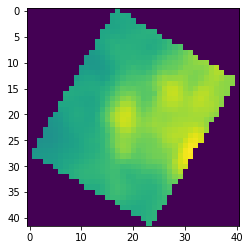

In [50]:
pl.imshow(mask.multiply(hdul[1].data))

1045.3299474872092

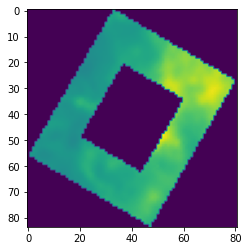

In [51]:
bgpreg = bgreg.to_pixel(ww)
bgmask = bgpreg.to_mask()
pl.imshow(bgmask.multiply(hdul[1].data))
bgim = bgmask.multiply(hdul[1].data)
bg = np.nanpercentile(bgim[bgim!=0], 10)
bg

In [52]:
(mask.multiply(hdul[1].data) *u.Unit(hdul[1].header['BUNIT']) * pixelarea).sum().to(u.Jy)

<Quantity 1104.39273803 Jy>

In [53]:
her250 = (mask.multiply(hdul[1].data - bg) *u.Unit(hdul[1].header['BUNIT']) * pixelarea).sum().to(u.Jy)
her250

<Quantity 320.71168157 Jy>

##  500 $\mu$m

In [54]:
hdul = fits.open(herfn_3)
ww = wcs.WCS(hdul[1].header)

In [55]:
hdul[1].header['BUNIT']

'MJy/sr'

In [56]:
pixelarea = ww.proj_plane_pixel_area().to(u.sr)

In [57]:
# preg is short for pixel region
preg = r0.to_pixel(ww)
mask = preg.to_mask()

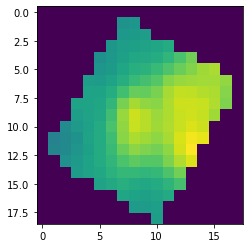

In [58]:
pl.imshow(mask.multiply(hdul[1].data))

166.24025654101402

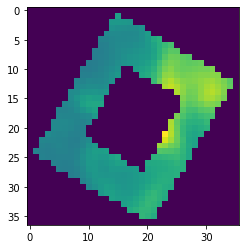

In [59]:
bgpreg = bgreg.to_pixel(ww)
bgmask = bgpreg.to_mask()
pl.imshow(bgmask.multiply(hdul[1].data))
bgim = bgmask.multiply(hdul[1].data)
bg = np.nanpercentile(bgim[bgim!=0], 10)
bg

In [60]:
(mask.multiply(hdul[1].data) *u.Unit(hdul[1].header['BUNIT']) * pixelarea).sum().to(u.Jy)

<Quantity 203.231906 Jy>

In [61]:
her500 = (mask.multiply(hdul[1].data - bg) *u.Unit(hdul[1].header['BUNIT']) * pixelarea).sum().to(u.Jy)
her500

<Quantity 78.39884789 Jy>

## Bolocam and ATLASGAL

##### Bolocam

In [62]:
bolo_1 = '/orange/adamginsburg/galactic_plane_surveys/bolocam/data/BOLOCAM_GPS/images/v2/INNER_GALAXY/map/v2.0_ds2_l006_13pca_map20.fits'
#v2.0_ds2_l004_13pca_map20.fits'
'/orange/adamginsburg/galactic_plane_surveys/bolocam/v2.0_ds2_l004_13pca_map20_crop.fits'
#bolo_2 = ''
'/orange/adamginsburg/galactic_plane_surveys/bolocam/v2.0_ds2_l006_13pca_map20_crop.fits'

# 1.1 mm


'/orange/adamginsburg/galactic_plane_surveys/bolocam/v2.0_ds2_l006_13pca_map20_crop.fits'

In [63]:
hdul = fits.open(bolo_1)
ww = wcs.WCS(hdul[0].header)

In [64]:
hdul[0].header['BUNIT'] 

'Jy/Beam'

In [65]:
hdul[0].header['PPBEAM']

23.8027621852

In [66]:
pixelarea = ww.proj_plane_pixel_area().to(u.sr)
#pixelarea = 1*u.pixel

In [67]:
pixelarea

<Quantity 1.21846951e-09 sr>

In [68]:
# preg is short for pixel region
preg = r0.to_pixel(ww)
mask = preg.to_mask()

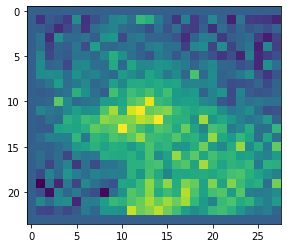

In [69]:
pl.imshow(mask.multiply(hdul[0].data))

-0.08993172869086266

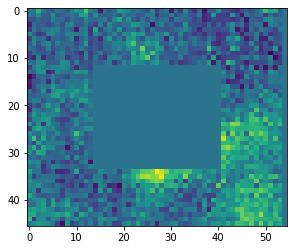

In [70]:
bgpreg = bgreg.to_pixel(ww)
bgmask = bgpreg.to_mask()
pl.imshow(bgmask.multiply(hdul[0].data))
bgim = bgmask.multiply(hdul[0].data)
bg = np.nanpercentile(bgim[bgim!=0], 10)
bg

In [71]:
#(mask.multiply(hdul[0].data) *u.Unit(hdul[0].header['BUNIT']) * pixelarea).sum().to(u.Jy)

(mask.multiply(hdul[0].data) / hdul[0].header['PPBEAM']).sum() * u.Jy

<Quantity 2.46103666 Jy>

In [72]:
bolo11 = (mask.multiply(hdul[0].data - bg) / hdul[0].header['PPBEAM']).sum() * u.Jy
bolo11

<Quantity 4.70529071 Jy>

In [73]:
#beam

##### ATLASGAL

In [74]:
atlas = '/orange/adamginsburg/galactic_plane_surveys/atlasgal/AG-Laboca-Planck.4.5.fits'
# Planck 353 GHz Survey
# 850 microns

In [75]:
agalhdul = hdul = fits.open(atlas)
agalww = ww = wcs.WCS(hdul[0].header)

In [76]:
hdul[0].header['BUNIT']

'JY/BEAM'

In [77]:
beam = radio_beam.Beam.from_fits_header(hdul[0].header)

In [78]:
beam.sr

<Quantity 1.17442275e-08 sr>

In [79]:
pixelarea = ww.proj_plane_pixel_area().to(u.sr)
pixelarea

<Quantity 2.68134526e-10 sr>

In [80]:
# preg is short for pixel region
preg = r0.to_pixel(ww)
mask = preg.to_mask()

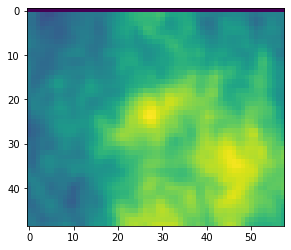

In [81]:
pl.imshow(mask.multiply(hdul[0].data))

In [82]:
(mask.multiply(hdul[0].data) * u.Jy / beam.sr * pixelarea).sum().to(u.Jy)

<Quantity 50.28018534 Jy>

0.43449212312698365

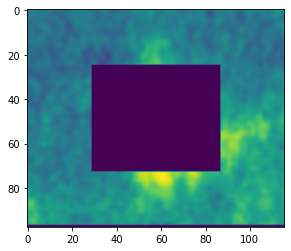

In [83]:
bgpreg = bgreg.to_pixel(ww)
bgmask = bgpreg.to_mask()
pl.imshow(bgmask.multiply(hdul[0].data))
bgim = bgmask.multiply(hdul[0].data)
bg = np.nanpercentile(bgim[bgim!=0], 10)
bg

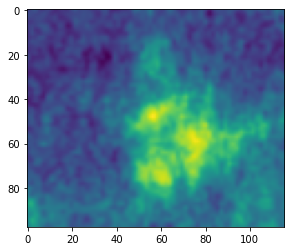

In [84]:
pl.imshow(bgmask.cutout(hdul[0].data))

In [85]:
(mask.multiply(hdul[0].data) * u.Jy * beam.sr / pixelarea).sum().to(u.Jy)

<Quantity 96458.45577077 Jy>

In [86]:
atlas850 = (mask.multiply(hdul[0].data - bg) * u.Jy / beam.sr * pixelarea).sum().to(u.Jy)
atlas850

<Quantity 22.66300035 Jy>

In [87]:
(beam.sr / pixelarea).decompose()

<Quantity 43.79975866>

## SEDIGISM

In [88]:
## ...which file?

## SED Fitting

In [89]:
(160*u.micron, 659.89016*u.Jy) # pacsfn_1
(70*u.micron, 8.9645548*u.Jy) # pacsfn_1
(350*u.micron, 531.67255*u.Jy) # herfn_2
(250*u.micron, 1104.3927*u.Jy) # herfn_1
(500*u.micron, 203.23191*u.Jy) # herfn_3
(1.1*u.mm, 2.4610367*u.Jy) # Bolocam
((353 * u.GHz).to(u.mm, equivalencies=u.spectral()), 50.280185*u.Jy) # ATLASGAL

(<Quantity 0.84927042 mm>, <Quantity 50.280185 Jy>)

In [90]:
(1104.3927*u.Jy-2.4610367*u.Jy)/(250*u.micron-(1.1*u.mm).to(u.micron))

<Quantity -1.29639019 Jy / micron>

In [91]:
(1104.3927*u.Jy-50.280185*u.Jy)/(250*u.micron-(353 * u.GHz).to(u.micron, equivalencies=u.spectral()))

<Quantity -1.75899307 Jy / micron>

In [92]:
(1.1*u.mm).to(u.micron)

<Quantity 1100. micron>

In [93]:
(353 * u.GHz).to(u.micron, equivalencies=u.spectral())

<Quantity 849.27041926 micron>

In [94]:
#  log(flux ratio)/log(nu ratio) = alpha
# Bolocam
np.log(1104.3927/2.4610367)/np.log(250/1100)

-4.121523670794213

In [95]:
# (500*u.micron, 203.23191*u.Jy) # herfn_3
np.log(203.23191/2.4610367)/np.log(500/1100)

-5.597975589704405

In [96]:
# ATLASGAL
np.log(1104.3927/50.280185)/np.log(250/850)

-2.524515304988999

In [97]:
np.log(203.23191/50.280185)/np.log(500/850)

-2.632232028487509

In [98]:
np.log(50.280185/2.4610367)/np.log(850/1100)

-11.701659239883302

In [99]:
atlas850

<Quantity 22.66300035 Jy>

In [100]:
sed = [(160*u.micron, pacs160, 'pacs', '160 um'), # pacsfn_1
(70*u.micron, pacs70, 'pacs', '70 um'), # pacsfn_1
(350*u.micron, her350, 'Herschel', '350 um'), # herfn_2
(250*u.micron, her250, 'Herschel', '250 um'), # herfn_1
(500*u.micron, her500, 'Herschel', '500 um'), # herfn_3
((1.1*u.mm).to(u.micron), bolo11, 'Bolocam' ,'1.1 mm'), # Bolocam
((353 * u.GHz).to(u.micron, equivalencies=u.spectral()), atlas850, 'ATLASGAL', '850 um')] # ATLASGAL

In [101]:
#sed = [pacs160, pacs70, her350, her250, her500, bolo11, atlas850]

In [102]:
(353 * u.GHz).to(u.micron, equivalencies=u.spectral())

<Quantity 849.27041926 micron>

In [103]:
freq = (np.linspace(70, 1100, num=100)*u.micron)#.to(u.GHz, equivalencies=u.spectral())
tau = 1

In [104]:
import astropy.constants as const
def planck_freq(nu, T):
    nu = nu.to(u.Hz, equivalencies=u.spectral())
    return (2 * const.h * nu**3 / const.c**2 ) * (np.exp(const.h*nu/(const.k_B*T)) - 1)**(-1)

def planck_func(lamb, T):
    lamb = lamb.to(u.m, equivalencies=u.spectral())
    return (2*const.h*const.c**2 / lamb.to(u.m)**5) * (np.exp((const.h*const.c) / (lamb * const.k_B * T)) - 1)**(-1)

#def Ray_Jeans():

def blackbody(freq, beta, T):
    b = planck_freq(freq, T)
    mb = b * freq**(beta)
    return mb

#bb = blackbody(freq, 2, 10*u.K)# * u.sr**(-1) * (0.0020285287 * u.sr)

In [105]:
r0

<RectangleSkyRegion(center=<SkyCoord (Galactic): (l, b) in deg
    (5.390779, -0.407864)>, width=195.4252 arcsec, height=163.3396 arcsec, angle=0.0 deg)>

In [106]:
from astropy.modeling import models
from astropy import units as u
freq = (np.geomspace(70, 1100, num=100)*u.micron)#.to(u.GHz, equivalencies=u.spectral())
bb = models.BlackBody(temperature=10*u.K)
bb = bb(freq.to(u.Hz, equivalencies=u.spectral()))
# 10−23 erg⋅s−1⋅cm−2⋅Hz−1
#help(r0)
area = (r0.height*r0.width).to(u.sr)
bb = (bb*area).to(u.Jy)
beta=1
nu=freq.to(u.Hz, equivalencies=u.spectral())
#mbb = bb*(nu/nu.min())**beta

In [107]:
area.to(u.arcmin**2)

<Quantity 8.86685389 arcmin2>

(1, 5000.0)

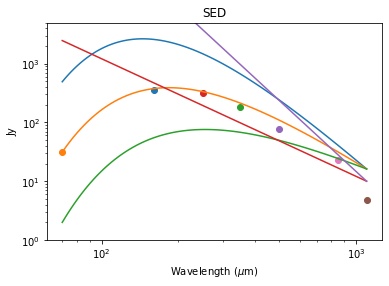

In [108]:
for point in sed: 
    #pl.scatter(point[0].to(u.GHz, equivalencies=u.spectral()), point[1], label=point[2])
    pl.scatter(point[0], point[1], label=point[2])
    #pl.legend()
  
pl.yscale('log')
pl.xscale('log')
pl.xlabel('Wavelength ($\mu$m)')
#pl.xlabel('Frequency (GHz)')
pl.ylabel('Jy')
bb = planck_freq(freq.to(u.Hz, u.spectral()), 20*u.K)*5e16
#pl.plot()
pl.plot(freq.to(u.micron, equivalencies=u.spectral()), bb*(nu/nu.min())**2)
pl.plot(freq.to(u.micron, equivalencies=u.spectral()), bb*(nu/nu.min())**1)
pl.plot(freq.to(u.micron, equivalencies=u.spectral()), bb)
pl.plot(freq.to(u.um, u.spectral()), (nu/nu.min())**2 * 10)
pl.plot(freq.to(u.um, u.spectral()), (nu/nu.min())**4 * 10)
pl.title('SED')
pl.ylim(1,5e3)

In [109]:
bb

<Quantity [ 1.99325497,  2.43102492,  2.94209464,  3.53392307,  4.21386728,
            4.9890243 ,  5.86606369,  6.85105515,  7.94929605,  9.16514387,
           10.50185887, 11.96146181, 13.54461149, 15.2505063 , 17.07681304,
           19.01962593, 21.0734572 , 23.23126027, 25.48448502, 27.82316409,
           30.23602799, 32.71064605, 35.23358964, 37.79061353, 40.36685068,
           42.94701598, 45.51561387, 48.05714535, 50.5563099 , 52.9981981 ,
           55.36847157, 57.65352703, 59.84064196, 61.91810014, 63.87529577,
           65.7028155 , 67.39249831, 68.93747374, 70.33217921, 71.5723579 ,
           72.65503853, 73.57849904, 74.34221608, 74.94680232, 75.3939338 ,
           75.68626926, 75.82736363, 75.82157744, 75.67398402, 75.3902761 ,
           74.97667312, 74.43983076, 73.7867535 , 73.02471124, 72.16116071,
           71.20367211, 70.15986147, 69.03732892, 67.84360308, 66.58609142,
           65.27203671, 63.9084793 , 62.50222494, 61.05981803, 59.58751984,
           5

In [110]:
point

(<Quantity 849.27041926 micron>,
 <Quantity 22.66300035 Jy>,
 'ATLASGAL',
 '850 um')

In [111]:
#u.Unit(hdul[0].header['BUNIT']) * pixelarea

# erg/s/cm2/Angstrom/steradian


In [112]:
# for bolocam (and maybe ATLASGAL?)
import radio_beam 

In [113]:
from spectral_cube import SpectralCube

In [114]:
cube = SpectralCube.read('../G5/sum/spw17_12CO/g5.12CO.spw17.im', format='casa_image')

/blue/adamginsburg/adamginsburg/repos/casa-formats-io/casa_formats_io/casa_dask.py:247: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]


In [115]:
beam = cube.beam

In [116]:
beam.jtok(cube.spectral_axis) * 350 

<Quantity [10.11410048, 10.11408977, 10.11407905, ..., 10.09221839,
           10.09220771, 10.09219703] K>

In [117]:
beam

Beam: BMAJ=28.2287919999996 arcsec BMIN=28.2287919999996 arcsec BPA=30.19542724110654 deg

In [118]:
agalww

WCS Keywords

Number of WCS axes: 2
CTYPE : 'GLON-TAN'  'GLAT-TAN'  
CRVAL : 4.5  0.0  
CRPIX : 1324.0  1527.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.000938207719922  0.000938207719922  
NAXIS : 2647  3054

In [119]:
coordinates.SkyCoord([(x*u.deg) for x in cube.wcs.celestial.calc_footprint(agalhdul[0].header)], frame='galactic')

<SkyCoord (Galactic): (l, b) in deg
    [(5.48373485, -0.43198972), (5.48391308,  3.64186539),
     (1.94669156,  3.64246849), (1.95356697, -0.43138927)]>

In [120]:
# why didn't this work?  The world may never know.
footprint = regions.PolygonSkyRegion(coordinates.SkyCoord([(x*u.deg) for x in cube.wcs.celestial.calc_footprint(agalhdul[0].header)], frame='galactic'))

In [121]:
footprint = regions.Regions.read('footprint.reg')
footprint = footprint[0] | footprint[1]
footprint

<CompoundSkyRegion(region1=Region: RectangleSkyRegion
center: <SkyCoord (Galactic): (l, b) in deg
    (5.443749, -0.33346)>
width: 277.0856 arcsec
height: 671.9766 arcsec
angle: 0.0 deg, region2=Region: RectangleSkyRegion
center: <SkyCoord (Galactic): (l, b) in deg
    (5.339672, -0.407246)>
width: 481.3272 arcsec
height: 154.4402 arcsec
angle: 0.0 deg, operator=<built-in function or_>)>

In [122]:
footprint_pix = footprint.to_pixel(agalww)

In [123]:
footprint_pix

<CompoundPixelRegion(region1=Region: RectanglePixelRegion
center: PixCoord(x=317.00277879021996, y=1170.5254080618492)
width: 82.05141383527044
height: 198.98771388414983
angle: -3.739444309758255e-10 deg, region2=Region: RectanglePixelRegion
center: PixCoord(x=427.9614072493372, y=1091.8780178410116)
width: 142.53038755997534
height: 45.7327605022947
angle: 5.851234163856134e-09 deg, operator=<built-in function or_>)>

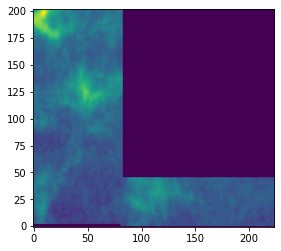

In [124]:
pl.imshow(footprint_pix.to_mask().multiply(agalhdul[0].data), origin='lower')

In [125]:
ls *.reg

footprint.reg


In [126]:
import dust_emissivity

In [127]:
dust_emissivity.dust.massofsnu?

Signature:
dust_emissivity.dust.massofsnu(
    nu,
    snu,
    distance=<Quantity 1. kpc>,
    temperature=<Quantity 20. K>,
    muh2=2.8,
    beta=1.75,
    beamomega=<Quantity 1. sr>,
)
Docstring: <no docstring>
File:      /blue/adamginsburg/adamginsburg/repos/dust_emissivity/dust_emissivity/dust.py
Type:      function


In [128]:
dust_emissivity.dust.massofsnu(271.1*u.GHz, 4.7052907*u.Jy, 7*u.kpc, temperature=10*u.K)

<Quantity 8812.07200452 solMass>

In [129]:
dust_emissivity.dust.massofsnu(271.1*u.GHz, 4.7052907*u.Jy, 7*u.kpc, temperature=20*u.K)

<Quantity 3021.38184981 solMass>

In [130]:
dust_emissivity.dust.massofsnu(271.1*u.GHz, 2.5*u.Jy, 7*u.kpc, temperature=10*u.K)

<Quantity 4682.00208202 solMass>

In [131]:
dust_emissivity.dust.massofsnu(271.1*u.GHz, 2.5*u.Jy, 7*u.kpc, temperature=10*u.K, beta=1.0)

<Quantity 4682.00208202 solMass>

In [132]:
dust_emissivity.dust.massofsnu(271.1*u.GHz, 2.5*u.Jy, 7*u.kpc, temperature=10*u.K, beta=2.0)

<Quantity 4682.00208202 solMass>

In [133]:
(870*u.um).to(u.GHz, u.spectral())

<Quantity 344.58903218 GHz>

In [134]:
dust_emissivity.dust.massofsnu(345*u.GHz, 50*u.Jy, 7*u.kpc, temperature=10*u.K, beta=2.0)

<Quantity 44466.04165556 solMass>

In [135]:
dust_emissivity.dust.massofsnu(345*u.GHz, 50*u.Jy, 7*u.kpc, temperature=10*u.K, beta=1.0)

<Quantity 56587.17953215 solMass>

In [136]:
dust_emissivity.dust.massofsnu(345*u.GHz, 50*u.Jy, 7*u.kpc, temperature=20*u.K, beta=1.0)

<Quantity 17207.92081284 solMass>

In [137]:
dust_emissivity.dust.massofsnu(345*u.GHz, 50*u.Jy, 7*u.kpc, temperature=20*u.K, beta=2.0)

<Quantity 13521.9342967 solMass>

In [138]:
pacs160_1 = 358.38372 * u.Jy
pacs70_1 = 31.272129 * u.Jy
her350_1 = 184.0481 * u.Jy
her250_1 = 320.71168 * u.Jy
her500_1 = 78.398848 * u.Jy
bolo11_1 = 4.7052907 * u.Jy
atlas850_1 = 22.663 * u.Jy

In [139]:
sed_1 = [(160*u.micron, pacs160_1, 'pacs', '160 um'), # pacsfn_1
(70*u.micron, pacs70_1, 'pacs', '70 um'), # pacsfn_1
(350*u.micron, her350_1, 'Herschel', '350 um'), # herfn_2
(250*u.micron, her250_1, 'Herschel', '250 um'), # herfn_1
(500*u.micron, her500_1, 'Herschel', '500 um'), # herfn_3
((1.1*u.mm).to(u.micron), bolo11_1, 'Bolocam' ,'1.1 mm'), # Bolocam
((353 * u.GHz).to(u.micron, equivalencies=u.spectral()), atlas850_1, 'ATLASGAL', '850 um')] # ATLASGAL

In [140]:
sed

[(<Quantity 160. micron>, <Quantity 358.38371942 Jy>, 'pacs', '160 um'),
 (<Quantity 70. micron>, <Quantity 31.27212871 Jy>, 'pacs', '70 um'),
 (<Quantity 350. micron>, <Quantity 184.04810149 Jy>, 'Herschel', '350 um'),
 (<Quantity 250. micron>, <Quantity 320.71168157 Jy>, 'Herschel', '250 um'),
 (<Quantity 500. micron>, <Quantity 78.39884789 Jy>, 'Herschel', '500 um'),
 (<Quantity 1100. micron>, <Quantity 4.70529071 Jy>, 'Bolocam', '1.1 mm'),
 (<Quantity 849.27041926 micron>,
  <Quantity 22.66300035 Jy>,
  'ATLASGAL',
  '850 um')]

In [141]:
modfit = dust_emissivity.fit_sed.fit_modified_bb(xdata=u.Quantity([p[0] for p in sed]).to(u.Hz, u.spectral()),
                                        flux=u.Quantity([p[1] for p in sed]),
                                        error=u.Quantity([1*u.Jy for p in sed]),
                                        guesses=[50*u.K, 2, 1e22*u.cm**-2],
                                        fitter='lmfit'
                                       )

In [142]:
modfit

[<Quantity 1.1259367 K>, 1.798511145405979, <Quantity -2.81071942e+14 1 / cm2>]

In [143]:
sed_1

[(<Quantity 160. micron>, <Quantity 358.38372 Jy>, 'pacs', '160 um'),
 (<Quantity 70. micron>, <Quantity 31.272129 Jy>, 'pacs', '70 um'),
 (<Quantity 350. micron>, <Quantity 184.0481 Jy>, 'Herschel', '350 um'),
 (<Quantity 250. micron>, <Quantity 320.71168 Jy>, 'Herschel', '250 um'),
 (<Quantity 500. micron>, <Quantity 78.398848 Jy>, 'Herschel', '500 um'),
 (<Quantity 1100. micron>, <Quantity 4.7052907 Jy>, 'Bolocam', '1.1 mm'),
 (<Quantity 849.27041926 micron>, <Quantity 22.663 Jy>, 'ATLASGAL', '850 um')]

In [144]:
modfit_1 = dust_emissivity.fit_sed.fit_modified_bb(xdata=u.Quantity([p[0] for p in sed_1]).to(u.Hz, u.spectral()),
                                        flux=u.Quantity([p[1] for p in sed_1]),
                                        error=u.Quantity([1*u.Jy for p in sed_1]),
                                        guesses=[50*u.K, 2, 1e22*u.cm**-2],
                                        fitter='lmfit'
                                       )

In [145]:
modfit_1

[<Quantity 12.87156422 K>,
 2.788046930111198,
 <Quantity 5.41796671e+15 1 / cm2>]

In [146]:
flux=u.Quantity([p[1] for p in sed])
error=u.Quantity([(1*u.Jy) for p in sed])

In [147]:
#help(dust_emissivity.fit_sed.fit_modified_bb)

In [148]:
(1*u.Jy).to(u.erg/u.second/u.cm**2/u.Hz)

<Quantity 1.e-23 erg / (cm2 Hz s)>

In [149]:
modfit

[<Quantity 1.1259367 K>, 1.798511145405979, <Quantity -2.81071942e+14 1 / cm2>]

/orange/adamginsburg/miniconda3/envs/python38/lib/python3.8/site-packages/ipykernel/pylab/backend_inline.py:231: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  for label in axis.get_ticklabels()])


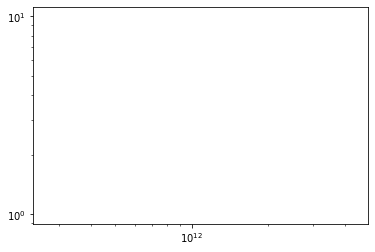

In [150]:
pl.loglog(freq.to(u.Hz, u.spectral()), 
          dust_emissivity.blackbody.modified_blackbody(freq.to(u.Hz, u.spectral()), 
                                                       temperature=modfit[0], beta=modfit[1],column=modfit[2]))

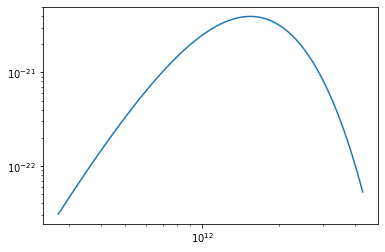

In [151]:
# modified_blackbody(frequencies, temperature, beta=0, column=1e22*u.cm**-2)
pl.loglog(freq.to(u.Hz, u.spectral()), 
          dust_emissivity.blackbody.modified_blackbody(freq.to(u.Hz, u.spectral()), 
                                                       temperature=modfit_1[0], beta=modfit_1[1],column=modfit_1[2]))

In [152]:
modfit_laptop = [12.76225787 * u.K, 2.524787732161178, 7.08477196e+15 / u.cm**2]

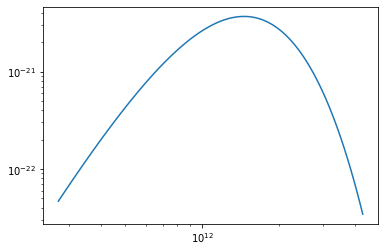

In [153]:
pl.loglog(freq.to(u.Hz, u.spectral()), 
          dust_emissivity.blackbody.modified_blackbody(freq.to(u.Hz, u.spectral()), 
                                                       temperature=modfit_laptop[0], beta=modfit_laptop[1],column=modfit_laptop[2]))
#pl.loglog(freq.to(u.Hz, u.spectral()), u.Quantity([p[1] for p in sed]))

In [154]:
freq

<Quantity [  70.        ,   71.97502498,   74.00577459,   76.09382108,
             78.24078105,   80.44831672,   82.71813723,   85.05199991,
             87.4517117 ,   89.91913049,   92.45616663,   95.06478433,
             97.74700324,  100.50490001,  103.34060985,  106.25632823,
            109.25431255,  112.33688394,  115.50642898,  118.76540159,
            122.11632496,  125.56179343,  129.10447456,  132.74711117,
            136.49252347,  140.34361125,  144.30335609,  148.37482371,
            152.56116634,  156.86562513,  161.29153268,  165.84231564,
            170.52149731,  175.33270042,  180.27964991,  185.3661758 ,
            190.59621621,  195.97382034,  201.50315165,  207.18849107,
            213.0342403 ,  219.04492526,  225.22519955,  231.57984807,
            238.11379073,  244.83208624,  251.73993606,  258.8426884 ,
            266.14584235,  273.65505218,  281.37613169,  289.31505869,
            297.47797968,  305.87121457,  314.50126159,  323.37480229,
      

In [155]:
#python -c "import dust_emissivity; print(dust_emissivity.__version__)"
print(dust_emissivity.__version__)

0.0.dev191


In [156]:
import astropy
print(astropy.__version__)

5.1.dev623+gd16bfe0


In [157]:
import scipy
print(scipy.__version__)

1.8.1


In [158]:
pwd

'/orange/adamginsburg/cmz/g5/code'

In [159]:
import lmfit
print(lmfit.__version__)

1.0.3


In [160]:
for row in sed:
    for item in row:
        print(item, type(item))

160.0 micron <class 'astropy.units.quantity.Quantity'>
358.38371942300404 Jy <class 'astropy.units.quantity.Quantity'>
pacs <class 'str'>
160 um <class 'str'>
70.0 micron <class 'astropy.units.quantity.Quantity'>
31.272128709626287 Jy <class 'astropy.units.quantity.Quantity'>
pacs <class 'str'>
70 um <class 'str'>
350.0 micron <class 'astropy.units.quantity.Quantity'>
184.0481014877351 Jy <class 'astropy.units.quantity.Quantity'>
Herschel <class 'str'>
350 um <class 'str'>
250.0 micron <class 'astropy.units.quantity.Quantity'>
320.71168157026347 Jy <class 'astropy.units.quantity.Quantity'>
Herschel <class 'str'>
250 um <class 'str'>
500.0 micron <class 'astropy.units.quantity.Quantity'>
78.39884788539362 Jy <class 'astropy.units.quantity.Quantity'>
Herschel <class 'str'>
500 um <class 'str'>
1100.0000000000002 micron <class 'astropy.units.quantity.Quantity'>
4.70529071304505 Jy <class 'astropy.units.quantity.Quantity'>
Bolocam <class 'str'>
1.1 mm <class 'str'>
849.270419263456 micron 

In [161]:
for row in sed_1:
    for item in row:
        print(item, type(item))

160.0 micron <class 'astropy.units.quantity.Quantity'>
358.38372 Jy <class 'astropy.units.quantity.Quantity'>
pacs <class 'str'>
160 um <class 'str'>
70.0 micron <class 'astropy.units.quantity.Quantity'>
31.272129 Jy <class 'astropy.units.quantity.Quantity'>
pacs <class 'str'>
70 um <class 'str'>
350.0 micron <class 'astropy.units.quantity.Quantity'>
184.0481 Jy <class 'astropy.units.quantity.Quantity'>
Herschel <class 'str'>
350 um <class 'str'>
250.0 micron <class 'astropy.units.quantity.Quantity'>
320.71168 Jy <class 'astropy.units.quantity.Quantity'>
Herschel <class 'str'>
250 um <class 'str'>
500.0 micron <class 'astropy.units.quantity.Quantity'>
78.398848 Jy <class 'astropy.units.quantity.Quantity'>
Herschel <class 'str'>
500 um <class 'str'>
1100.0000000000002 micron <class 'astropy.units.quantity.Quantity'>
4.7052907 Jy <class 'astropy.units.quantity.Quantity'>
Bolocam <class 'str'>
1.1 mm <class 'str'>
849.270419263456 micron <class 'astropy.units.quantity.Quantity'>
22.663 Jy

In [162]:
print(u.Quantity([np.round(p[0]) for p in sed]).to(u.Hz, u.spectral()))
print(u.Quantity([np.round(p[1]) for p in sed]))

[1.87370286e+12 4.28274940e+12 8.56549880e+11 1.19916983e+12
 5.99584916e+11 2.72538598e+11 3.53112436e+11] Hz
[358.  31. 184. 321.  78.   5.  23.] Jy


In [163]:
print(u.Quantity([p[0] for p in sed_1]).to(u.Hz, u.spectral()))
print(u.Quantity([p[1] for p in sed_1]))

[1.87370286e+12 4.28274940e+12 8.56549880e+11 1.19916983e+12
 5.99584916e+11 2.72538598e+11 3.53000000e+11] Hz
[358.38372    31.272129  184.0481    320.71168    78.398848    4.7052907
  22.663    ] Jy


In [164]:
modfit_what = dust_emissivity.fit_sed.fit_modified_bb(xdata=u.Quantity([np.round(p[0]) for p in sed]).to(u.Hz, u.spectral()),
                                        flux=u.Quantity([np.round(p[1]) for p in sed]),
                                        error=u.Quantity([1*u.Jy for p in sed]),
                                        guesses=[50*u.K, 2, 1e22*u.cm**-2],
                                        fitter='lmfit'
                                       )
modfit_what

[<Quantity 1.98917668 K>,
 1.9818019923926122,
 <Quantity -9.62283992e+13 1 / cm2>]